<a href="https://colab.research.google.com/github/kokchun/Maskininlarning-AI21/blob/main/Lectures/L1-Gradient_descent.ipynb" target="_parent"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> &nbsp; for interacting with the code


---
# Lecture notes - Gradient descent
---

This is the lecture note for **gradient descent**

<p class = "alert alert-info" role="alert"><b>Note</b> that this lecture note gives a brief introduction to gradient descent. I encourage you to read further about gradient descent. </p>

Read more

- [gradient descent (GD)](https://en.wikipedia.org/wiki/Gradient_descent)
- [stochastic gradient descent (SGD)](https://en.wikipedia.org/wiki/Stochastic_gradient_descent)
---


## Simulate data

We simulate a simple dataset

$X \sim \mathcal{U}(0,1)$

$y = 2 + 9X +\epsilon$

$\epsilon \sim \mathcal{N}(0,1)$


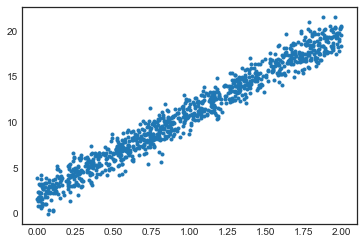

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

plt.style.use("seaborn-white")
samples = 1000

X = 2*np.random.rand(samples, 1)
y = 2+9*X+np.random.randn(samples,1)

plt.plot(X,y, '.');

In [4]:
X = np.c_[np.ones(samples), X]
X[:5]

array([[1.        , 0.27674527],
       [1.        , 0.52731114],
       [1.        , 1.19565565],
       [1.        , 1.38981968],
       [1.        , 0.06259262]])

## Train|test split

We now use scikit-learn for train_test_split

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

# adds up to 1000
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((670, 2), (330, 2), (670, 1), (330, 1))

---

## Computational complexity with Normal equation

The normal equations used in last lecture requires inverting the matrix $X^TX$ which computational complexity reaches $\mathcal{O}(n^3)$ for normal inversion, and $\mathcal{O}(n^2)$ using pseudo-inverse or scikit-learns LinearRegression class.

So if $X$ is $[m,n]$ then $X^TX$ is $[n,m]\times[m,n] = [n,n]$, which means that the computational complexity depends on the number of features. This becomes a problem for large amount of features e.g. 100000. 

---

## Gradient descent

Another way and more general way to train linear regression is by using gradient descent, which is an iterative optimization approach. It works by taking a cost function e.g. MSE, 

$$C = \frac{1}{m}\sum_{i=1}^m (\vec{y}_i - \hat{\vec{y}}_i)^2 = \frac{1}{m} \sum_{i=1}^m (\vec{y}_i - \vec{\theta}\cdot \vec{x}_i)^2$$

Here $\vec{\theta}$ are the parameters that is weights and bias or $\hat{\beta}$ when referred to last lecture.

The main idea with gradient descent is to minimize the cost function (a number representing the error, between label and prediction) through taking small steps one at a time in the direction of the steepest descent. Through multivariate calculus the steepest ascent is the gradient of the multivariate function, so we take the negative diretion of the gradient. 

$$\vec{\theta}_{j+1} = \vec{\theta}_j - \eta\nabla_{\vec{\theta}} C(\vec{\theta})$$

where $\eta$ is the learning rate, $\nabla_{\vec\theta}$ is the gradient w.r.t. $\vec{\theta}$ and $j$ is the iteration step. By adjusting $\eta$ we get different step sizes. With some calculus the gradient becomes:

$$\nabla_{\vec\theta} C(\vec{\theta}) = \ldots = \frac{2}{m}X^T(X\vec{\theta}-\vec{y})$$

This is called batch gradient descent as it uses whole training batch, which will be slow on large training set.

TODO: Rita bilder

In [6]:
def gradient_descent(X, y, learning_rate = .1, iterations = 100):
    m = len(X_train)

    theta = np.random.randn(X.shape[1],1)
    #print(f"Initialize theta with randomized\n {theta}")

    for _ in range(iterations):
        gradient = 2/m*X.T@(X@theta-y)
        theta -= learning_rate*gradient

    return theta

theta = gradient_descent(X_train, y_train)
theta.reshape(-1)

array([2.126792  , 8.83516222])

In [7]:
steps = range(1,200,1)
thetas = [gradient_descent(X, y, iterations = iteration).reshape(-1) for iteration in steps]
thetas = np.array(thetas)
thetas.shape

(199, 2)

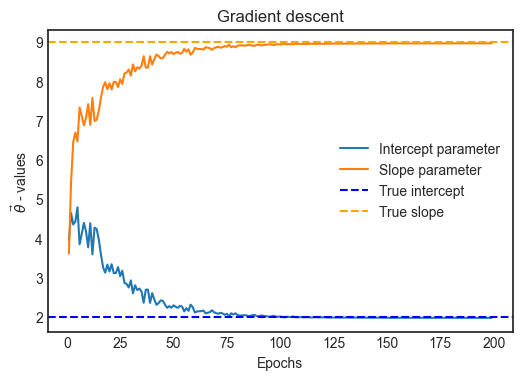

In [8]:
fig, ax = plt.figure(dpi=100), plt.axes()
ax.plot(steps, thetas, label = ["Intercept parameter", "Slope parameter"])
ax.axhline(y=2, color='b', linestyle='--', label="True intercept")
ax.axhline(y=9, color='orange', linestyle='--', label="True slope")
# one epoch is when algorithm seen the whole data once
ax.set(xlabel = "Epochs", ylabel = r"$\vec{\theta}$ - values", title="Gradient descent" )
ax.legend();

---
## Stochastic gradient descent

Batch gradient descent is slow on large amount of data as the whole training set is used on computing the gradient at each iteration. Also a drawback is that it might get stuck on a local minima instead of a global.

Stochastic gradient descent (SGD) instead calculates gradient based on one instance, which causes the road to minimum to be very bumpy. Due to its stochasticity it has higher chance to jump out of local minima. It can come close to but never reach the optimal solution. 

TODO: rita bild

In [9]:
# code from Geron (2019)
epochs = 10
t0, t1 = 5, 50  # learning schedule hyperparameters

def learning_rate_schedule(t):
    """Decrease learning rate as training progresses"""
    return t0/(t+t1)

theta = np.random.randn(2,1)
m = len(X_train)

for epoch in range(epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        x_i = X_train[random_index:random_index+1] # this gives an extra dimension on the matrix
        y_i = y_train[random_index:random_index+1]
        gradients = 2*x_i.T.dot(x_i.dot(theta)-y_i)
        eta = learning_rate_schedule(epoch*m+i)
        theta -= eta*gradients

# with so few epochs we already reach near optimal solution
theta


array([[1.94138963],
       [8.94725317]])

# Mini batch gradient descent 

Computes gradient on small batches of randomly chosen training data. It will end up closer to the minimum than SGD. The big advantage is performance when using GPUs. Feel free to implement mini batch gradient descent yourself.

## Evaluate on testing data

In [10]:
y_pred = X_test@theta
MAE = np.mean(np.absolute(y_test-y_pred))
MSE = np.mean((y_test-y_pred)**2)
RMSE = np.sqrt(MSE)

MAE, MSE, RMSE

(0.7905047572221909, 1.025576586087167, 1.0127075521033537)

---

Kokchun Giang

[LinkedIn][linkedIn_kokchun]

[GitHub portfolio][github_portfolio]

[linkedIn_kokchun]: https://www.linkedin.com/in/kokchungiang/
[github_portfolio]: https://github.com/kokchun/Portfolio-Kokchun-Giang

---
